<h1>Erdovlatov Ismadiiar Erkinovich, AIN-1-21</h1>

<h1>Laboratory Work 7 7</h1>
<h2>Working with Text Data.</h2>

In [4]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import matplotlib.pyplot as plt
import numpy as np


In [5]:
car_trading = [
    "Fantastic car shop with excellent service!",
    "The friendliest staff at this car dealership. Outstanding service.",
    "Great website for this car dealership and top-notch service.",
    "Convenient car shop with a diverse selection. The staff is very attentive and friendly.",
    "Wide selection of cars. Prices are reasonable, and the service is top-notch.",
    "Car shop in the city center. The atmosphere is a bit posh, but the selection of vehicles is impressive.",
    "Affordable car shop with high quality. The products are generally good, but the service could be better.",
    "Car shop with exclusive models. The selection is interesting, but you need to pay attention to the price.",
    "Excellent shop for buying a car. Competent consultants and a large assortment.",
    "Car shop with promotions. Prices are quite reasonable, and the service is at a good level.",
    "Car shop with a high level of service. They helped me choose an excellent option.",
    "Car shop with a wide range. Excellent prices and professional consultants.",
    "Car shop with modern models. Prices correspond to the quality of the product.",
    "Car shop with fast delivery. Ordered - delivered on time, everything is excellent.",
    "Car shop with a warranty on the product. You can make purchases with peace of mind.",
    "Car shop with friendly staff. They helped with the choice, explained everything in detail.",
    "Car shop with a high rating. Did not disappoint, highly recommend.",
    "Car shop with up-to-date models. Always something new to find.",
    "Car shop with modern technology. Everything you need is here.",
    "Car shop with professional service. They solve any issues quickly and qualitatively.",
    "Car shop with customer support. Answered all questions, helped to make a choice.",
    "Car shop with responsive support service. Very convenient in case of problems.",
    "Car shop with durable products. Happy with the purchase, everything works fine.",
]

In [18]:
car_trading = [
    "Positive experience with the car trading platform!",
    "Easy and convenient car trading process.",
    "Found a great deal on the car trading website.",
    
]

words = []
for review in car_trading:
    words += review.split()

word_counts = collections.Counter(words)
print(word_counts.most_common(10))


[('car', 3), ('trading', 3), ('the', 2), ('Positive', 1), ('experience', 1), ('with', 1), ('platform!', 1), ('Easy', 1), ('and', 1), ('convenient', 1)]


In [10]:
vect = CountVectorizer()
X = vect.fit_transform(car_trading)

print(f"Matrix shape: {X.shape}")


Matrix shape: (3, 16)


In [11]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)
lda.components_.shape

(10, 16)

In [12]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
trading       trading       website       trading       trading       
car           car           on            car           car           
the           the           great         the           the           
process       process       found         process       process       
easy          easy          deal          easy          easy          
convenient    convenient    the           convenient    convenient    
and           and           trading       and           and           
with          with          car           with          with          
positive      positive      process       positive      positive      
platform      platform      easy          platform      platform      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
trad

In [13]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
with          with          with          with          with          with          with          
website       website       website       website       website       website       website       
trading       trading       trading       trading       trading       trading       trading       
the           the           the           the           the           the           the           
process       process       process       process       process       process       process       
positive      positive      positive      positive      positive      positive      positive      
platform      platform      platform      platform      platform      platform      platform      
on            on            on            on            on            on            on            
great     

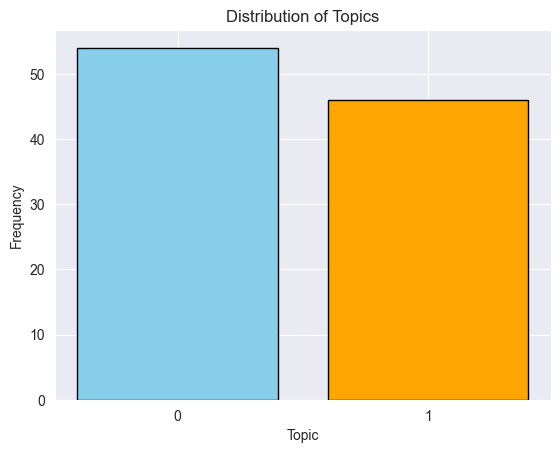

In [32]:
import matplotlib.pyplot as plt
import numpy as np


document_topics = np.random.choice([0, 1], size=100)  

colors = ['skyblue', 'orange']
unique_topics, topic_counts = np.unique(document_topics, return_counts=True)

plt.bar(unique_topics, topic_counts, color=colors, edgecolor='black')
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.title("Distribution of Topics")
plt.xticks(unique_topics)  # If you want to customize the x-axis ticks
plt.show()






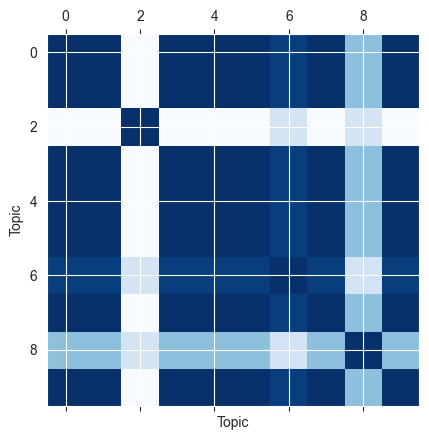

In [22]:
correlation = np.corrcoef(document_topics.T)

plt.matshow(correlation, cmap="Blues")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()
